In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri di input
dz = 0.01  # Spessore degli strati (km)
ztop = 30  # Altezza massima (km)
h = 7  # Altezza scala (km)
w1 = 0.05  # Mixing ratio 1
w2 = w1 * 2  # Mixing ratio 2
sigma = np.array([0.1, 1, 5, 20])  # Sezioni d'urto per unità di massa


In [32]:
# Creazione dell'asse delle altezze
z = np.arange(0, ztop + dz, dz)
n = len(z)

# Calcolo del profilo di densità dell'aria secca e dell'assorbitore
#Il gas assorbitore è proporzionale alla densità dell'aria secca con un mixing ratio w
rhodry = 1.25 * np.exp(-z / h)  # Profilo di densità aria secca
rho1 = rhodry * w1
rho2 = rhodry * w2

# Normalizzazione degli integrali della densità
norm1 = h * (1 - np.exp(-ztop / h)) * w1
norm2 = h * (1 - np.exp(-ztop / h)) * w2

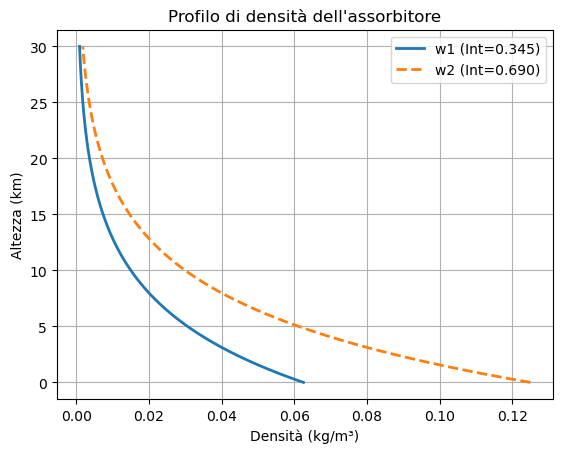

In [34]:
# Plot del profilo di densità
plt.figure()
plt.plot(rho1, z, label=f"w1 (Int={norm1:.3f})", linewidth=2)
plt.plot(rho2, z, '--', label=f"w2 (Int={norm2:.3f})", linewidth=2)
plt.xlabel("Densità (kg/m³)")
plt.ylabel("Altezza (km)")
plt.title("Profilo di densità dell'assorbitore")
plt.legend()
plt.grid()

In [35]:
# Densità media tra strati consecutivi
arh1 = 0.5 * (rho1[:-1] + rho1[1:])
arh2 = 0.5 * (rho2[:-1] + rho2[1:])

In [36]:
# Definizione dell'asse delle altezze
n = z.size  # Numero di strati atmosferici
m = sigma.size  # Numero di coefficienti di assorbimento

#SELEZIONA DENSITA GAS
rho = rho1

# Creazione della matrice Optical Depth (OD)
od_matrix = sigma[:, None] * rho * dz  # Matrice (m x n)

In [37]:
# Calcolo Optical Depth cumulativa dalla superficie al TOA
od_cumulative = np.cumsum(od_matrix[:, ::-1], axis=1)[:, ::-1]  # Somma dal basso verso l'alto

# Calcolo della trasmissività dalla superficie al TOA
tau_surface_to_toa = np.exp(-od_cumulative)  # Matrice (m x n)


In [38]:
tau_matrix.shape

(4, 3001)

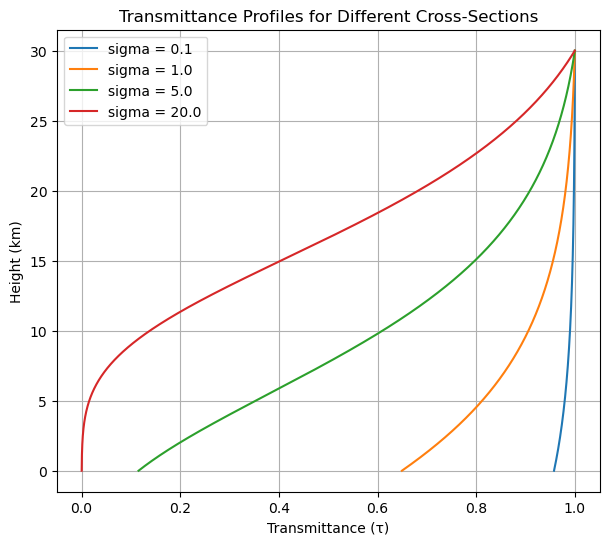

In [39]:
# Plot dei profili di trasmittanza per i vari valori di coe
plt.figure(figsize=(7, 6))
for i in range(m):
    plt.plot(tau_surface_to_toa[i, :], z, label=f'sigma = {sigma[i]}')

plt.xlabel("Transmittance (τ)")
plt.ylabel("Height (km)")
plt.title("Transmittance Profiles for Different Cross-Sections")
plt.legend()
plt.grid()


In [43]:
# Calcolo della matrice delle funzioni di ponderazione (Weighting Functions)
w_matrix = np.diff(tau_surface_to_toa, axis=1) / dz  # Differenze finite tra gli strati

# Aggiungiamo una colonna finale di zeri per mantenere la stessa dimensione di tau_matrix
w_matrix = np.hstack([w_matrix, np.zeros((m, 1))])


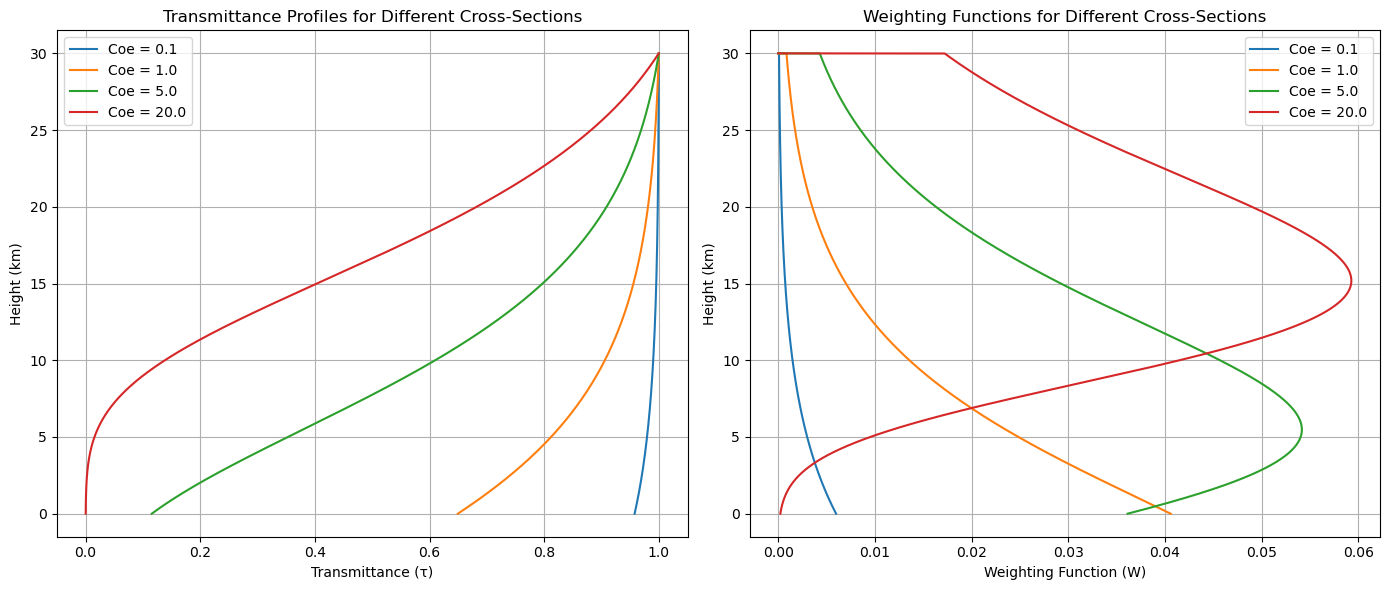

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot della trasmissività (tau)
for i in range(m):
    axs[0].plot(tau_surface_to_toa[i, :], z, label=f'Coe = {coe[i]}')

axs[0].set_xlabel("Transmittance (τ)")
axs[0].set_ylabel("Height (km)")
axs[0].set_title("Transmittance Profiles for Different Cross-Sections")
axs[0].legend()
axs[0].grid()

# Plot della funzione di ponderazione (W)
for i in range(m):
    axs[1].plot(w_matrix[i, :], z, label=f'Coe = {coe[i]}')

axs[1].set_xlabel("Weighting Function (W)")
axs[1].set_ylabel("Height (km)")
axs[1].set_title("Weighting Functions for Different Cross-Sections")
axs[1].legend()
axs[1].grid()

# Mostra entrambi i plot
plt.tight_layout()